In [1]:
# Self Organizing Map
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler # Feature scaling
from minisom import MiniSom # Self organizing map

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [5]:
print(x.shape, y.shape)

(690, 15) (690,)


<IPython.core.display.Javascript object>


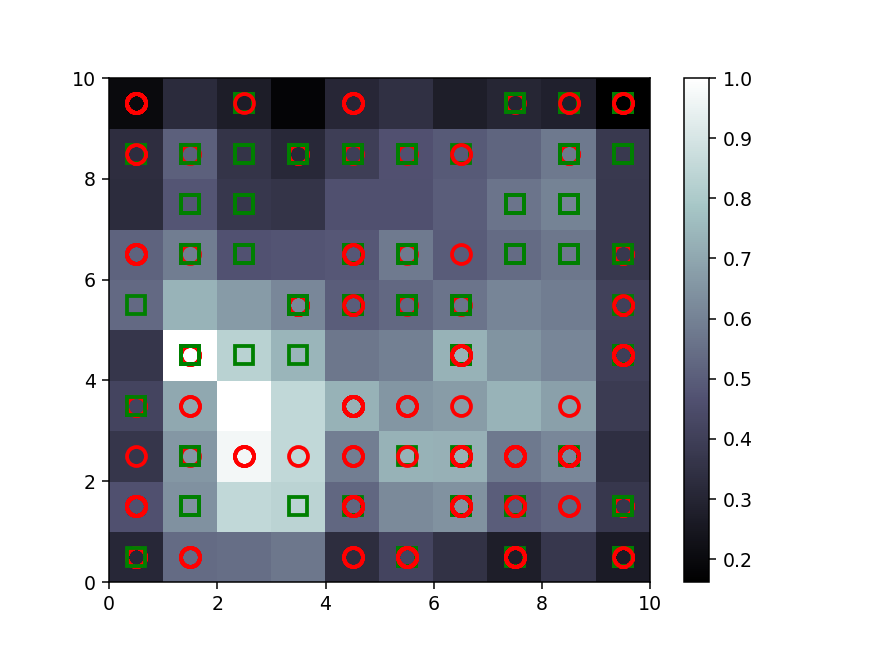

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
x_sc = sc.fit_transform(x)

# Training the self organising map
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5) #input length 14 + 1 = 15
som.random_weights_init(x_sc)
som.train_random(data = x_sc, num_iteration = 100)


# Visualizing the results that we need to build from scratch, there is no SOM library in matplotlib
%matplotlib notebook
#from pylab import bone, pcolor, colorbar, plot, show
plt.bone()
plt.pcolor(som.distance_map().T) # return a matrix of all distances
plt.colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(x_sc):
    w = som.winner(x)
    plt.plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.show()

In [8]:
# Finding the frauds
mappings = som.win_map(x_sc)

In [9]:
len(mappings)

68

In [10]:
len(mappings[(1, 4)]) # (8, 3 is the cordinate of the white square on the map that is customers who cheated)

17

In [12]:
frauds = np.concatenate((mappings[(8, 3)], mappings[(5, 3)]), axis = 0)
frauds

array([[9.44059360e-01, 0.00000000e+00, 1.06466165e-01, 1.78571429e-02,
        0.00000000e+00, 6.92307692e-01, 1.25000000e-01, 3.50877193e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.30000000e-01, 0.00000000e+00],
       [3.60166420e-01, 1.00000000e+00, 1.32781955e-01, 5.35714286e-02,
        0.00000000e+00, 3.84615385e-01, 3.75000000e-01, 1.89473684e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 6.00000000e-02, 6.70000000e-04],
       [4.98296153e-01, 1.00000000e+00, 3.04511278e-01, 1.96428571e-01,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 5.26315789e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 3.00000000e-02, 0.00000000e+00],
       [5.85686885e-01, 1.00000000e+00, 1.79248120e-01, 1.03571429e-02,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 5.26315789e-02,
        0.00000000e+00, 0.00000000e+0

In [13]:
frauds = sc.inverse_transform(frauds)

In [14]:
frauds

array([[1.5801473e+07, 0.0000000e+00, 2.0830000e+01, 5.0000000e-01,
        1.0000000e+00, 1.0000000e+01, 2.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.6000000e+02, 1.0000000e+00],
       [1.5655658e+07, 1.0000000e+00, 2.2580000e+01, 1.5000000e+00,
        1.0000000e+00, 6.0000000e+00, 4.0000000e+00, 5.4000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.2000000e+02, 6.8000000e+01],
       [1.5690153e+07, 1.0000000e+00, 3.4000000e+01, 5.5000000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 6.0000000e+01, 1.0000000e+00],
       [1.5711977e+07, 1.0000000e+00, 2.5670000e+01, 2.9000000e-01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00,